In [1]:
# project idea note
# https://docs.google.com/document/d/1_Tp3DhT_5sD2-RbuMpkKVjSKfcNsOQAvUdDc6ZCoJtc/edit?usp=sharing

# data 
# https://www.kaggle.com/valentinjoseph/avocado-sales-20152021-us-centric (no code)

#### Some relevant columns in the dataset:

Date - The date of the observation
averageprice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold  (The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table).
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
%matplotlib inline
import os

from library.sb_utils import save_file
import warnings
plt.rcParams['figure.figsize'] = (10, 7)
sns.set_style('whitegrid')
#plt.style.use('seaborn-colorblind')

In [3]:
#df = pd.read_csv('./data/df.csv', index_col='Date', parse_dates=True);
df_ne = pd.read_csv('./data/df_ne.csv', index_col='Date', parse_dates=True);
#df_us = pd.read_csv('./data/df_us.csv', index_col='Date', parse_dates=True);
#df_ny = pd.read_csv('./data/df_ny.csv', index_col='Date', parse_dates=True);

#### Inspction of the dataframe

In [4]:
df_ne.head(2)

,AveragePrice,TotalVolume,type,year,region
Date,,,,,
2015-01-04,1.09,3759282.62,conventional,2015,Northeast
2015-01-04,1.88,48280.46,organic,2015,Northeast


In [5]:
df_ne_org=df_ne[df_ne['type']=='organic']
df_ne_con=df_ne[df_ne['type']=='conventional']

# EDA for New_york 

In [6]:
df_ne.head(3)

,AveragePrice,TotalVolume,type,year,region
Date,,,,,
2015-01-04,1.09,3759282.62,conventional,2015,Northeast
2015-01-04,1.88,48280.46,organic,2015,Northeast
2015-01-11,1.28,3056024.77,conventional,2015,Northeast


In [7]:
# What cities had the highest/lowest volume
df_ne.groupby(['type'])['TotalVolume'].sum().astype(int)

type
conventional    1655592415
organic           72416460
Name: TotalVolume, dtype: int32

<AxesSubplot:ylabel='type,year'>

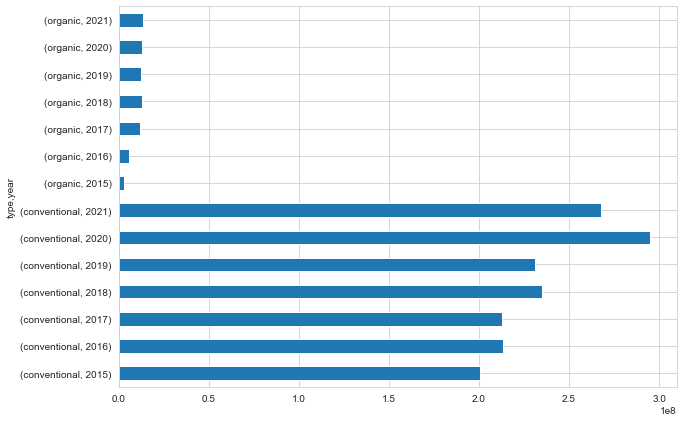

In [8]:
# What cities had the highest/lowest volume of organic avocado
df_ne.groupby(['type', 'year'])['TotalVolume'].sum().astype(int).plot(kind='barh')

In [9]:
df_ne.groupby(['type', 'year'])['TotalVolume'].sum().astype(int)

type          year
conventional  2015    200497187
              2016    213418852
              2017    212887297
              2018    234775831
              2019    231254788
              2020    294875594
              2021    267882861
organic       2015      2881798
              2016      5512233
              2017     11760003
              2018     13009994
              2019     12486211
              2020     13088848
              2021     13677371
Name: TotalVolume, dtype: int32

conventional    361
organic         361
Name: type, dtype: int64


C:\Users\mirei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


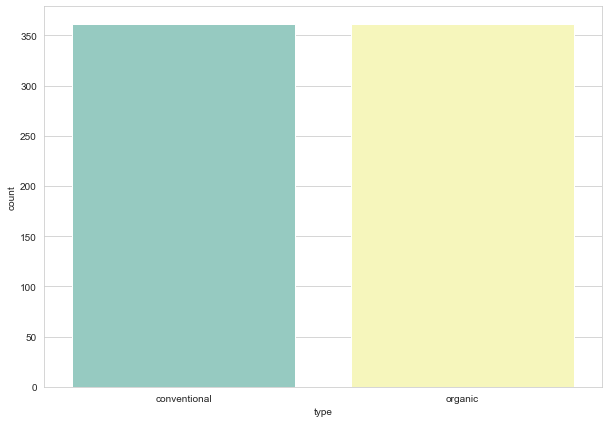

In [10]:
print(df_ne['type'].value_counts())
sns.countplot('type', data=df_ne, palette='Set3')

plt.show()

In [11]:
df1=df_ne.copy().reset_index()

In [12]:
# Ingeneral, the price drop from 2019 to 2021 (due to covid 19)

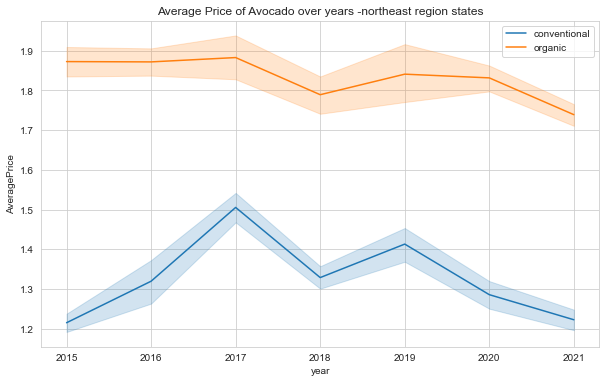

In [13]:
# yearly average prices by avocado type
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df1, x="year", y="AveragePrice", hue="type")
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(loc='upper right')
plt.title("Average Price of Avocado over years -northeast region states")
plt.show()

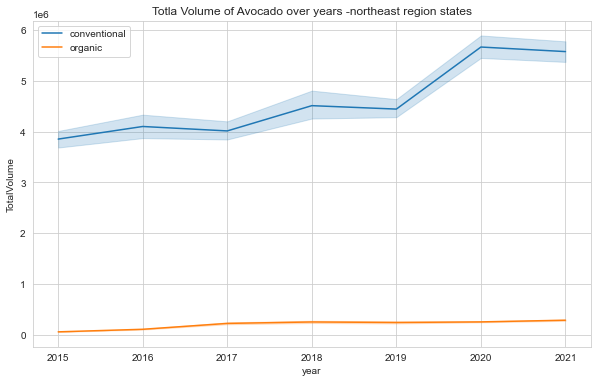

In [14]:
# yearly average prices by avocado type
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df1, x="year", y="TotalVolume", hue="type")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(loc='upper left')
plt.title("Totla Volume of Avocado over years -northeast region states")
plt.show()

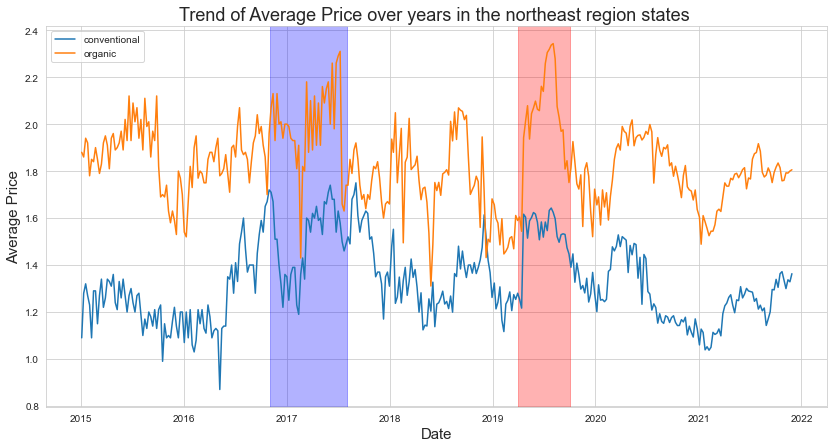

In [15]:
fig, ax = plt.subplots(figsize=(14,7))
sns.lineplot(data=df1, x="Date", y="AveragePrice", hue="type", ci=None)
ax.set_title('Trend of Average Price over years in the northeast region states ',fontsize=18)
ax.axvspan('2016-11-01', '2017-08-01', color ='blue', alpha=0.3)
ax.axvspan('2019-04-01', '2019-10-01', color ='red', alpha=0.3)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Average Price',fontsize=15)
ax.legend(loc='upper left') 
plt.show()

Text(0.5, 1.0, 'Avocado prices')

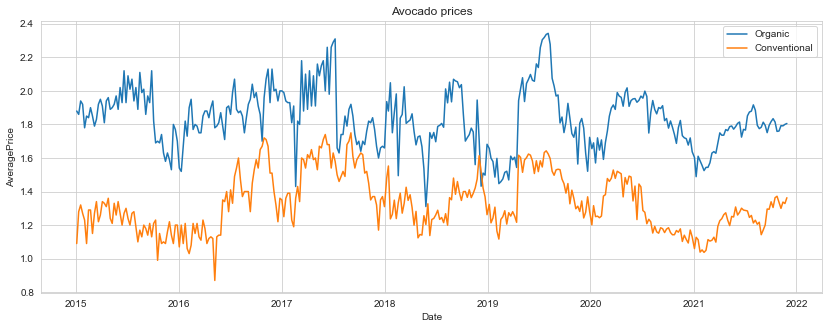

In [16]:
# plot Organic versus Conventional
plt.figure(figsize=(14,5))

sns.lineplot(data=df_ne_org["AveragePrice"],label="Organic")
sns.lineplot(data=df_ne_con["AveragePrice"],label="Conventional")

plt.xlabel("Date")
plt.title('Avocado prices')

Text(0.5, 1.0, 'Avocado TotalVolume in the northeast region states')

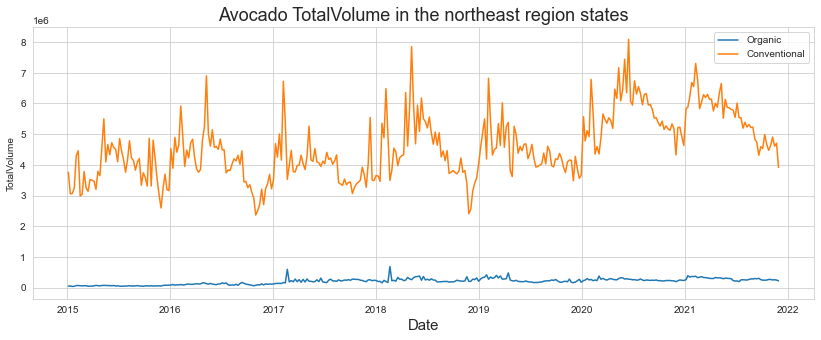

In [17]:
# plot Organic versus Conventional in Los Angeles
plt.figure(figsize=(14,5))

sns.lineplot(data=df_ne_org["TotalVolume"],label="Organic")
sns.lineplot(data=df_ne_con["TotalVolume"],label="Conventional")

plt.xlabel("Date",fontsize=15)
plt.title('Avocado TotalVolume in the northeast region states',fontsize=18)

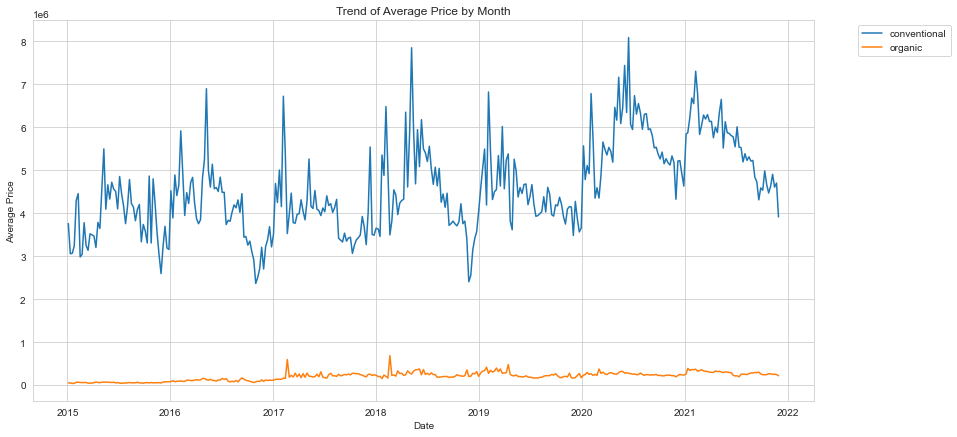

In [18]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title('Trend of Average Price by Month')
ax.set_xlabel('Date')
ax.set_ylabel('Average Price')
sns.lineplot(data=df1, x="Date", y="TotalVolume", hue="type", ci=None)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

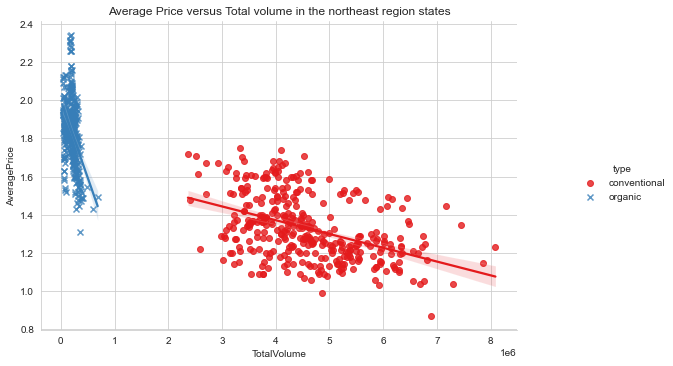

In [19]:
g= sns.lmplot(x="TotalVolume", y="AveragePrice", 
           data=df1, hue="type", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Average Price versus Total volume in the northeast region states')
plt.show()

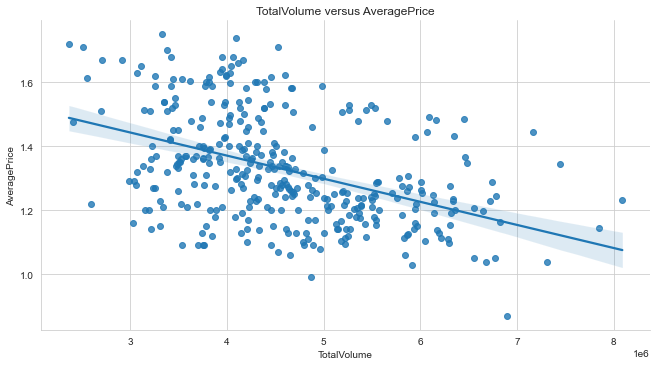

In [20]:
g= sns.lmplot(x='TotalVolume', y='AveragePrice', 
           data=df_ne_con)
g.fig.set_size_inches(10,5)
plt.title('TotalVolume versus AveragePrice')
plt.show()

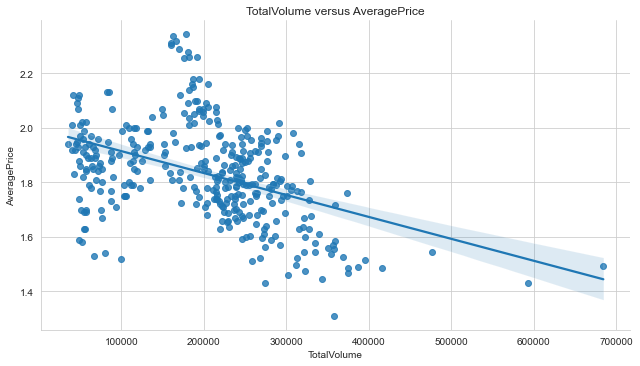

In [21]:
g= sns.lmplot(x='TotalVolume', y='AveragePrice', 
           data=df_ne_org)
g.fig.set_size_inches(10,5)
plt.title('TotalVolume versus AveragePrice')
plt.show()

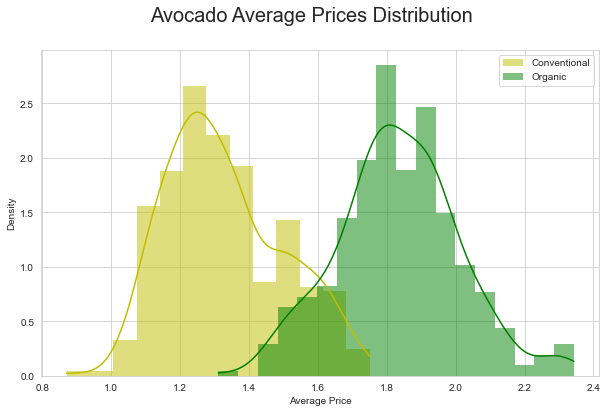

In [22]:
#sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Avocado Average Prices Distribution', fontsize = 20)
ax1 = sns.histplot(df1[df1['type']=='conventional']["AveragePrice"],
                   color = 'y', label = 'Conventional', kde=True,
                   stat="density",linewidth=0)
ax2 = sns.histplot(df1[df1['type']=='organic']["AveragePrice"],
                   color = 'g', label = 'Organic', kde=True, stat="density",
                   linewidth=0)
ax.set_xlabel('Average Price')
plt.legend(title_fontsize = 12)
plt.show()

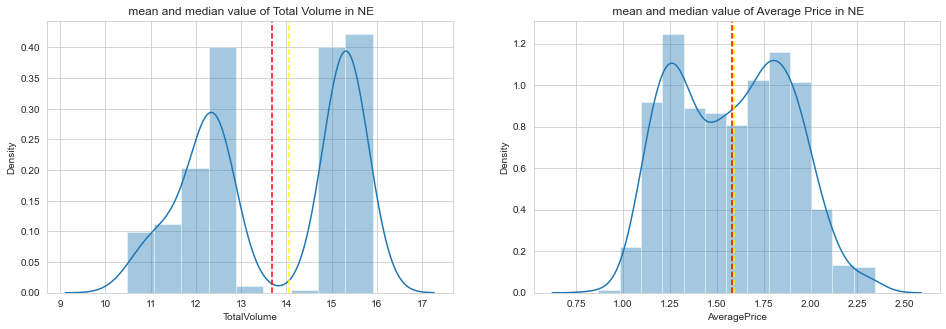

In [23]:
#  Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(np.log(df1['TotalVolume']))
plt.axvline(np.log(df1['TotalVolume']).mean(), linestyle = '--', color = "red")
plt.axvline(np.log(df1['TotalVolume']).median(), linestyle = '--', color = "yellow")
plt.title(' mean and median value of Total Volume in NE')
plt.subplot(1,2,2)
sns.distplot(df1['AveragePrice'])
plt.axvline(df1['AveragePrice'].mean(), linestyle = '--', color = "red")
plt.axvline(df1['AveragePrice'].median(), linestyle = '--', color = "yellow")
plt.title(' mean and median value of Average Price in NE')
plt.show()

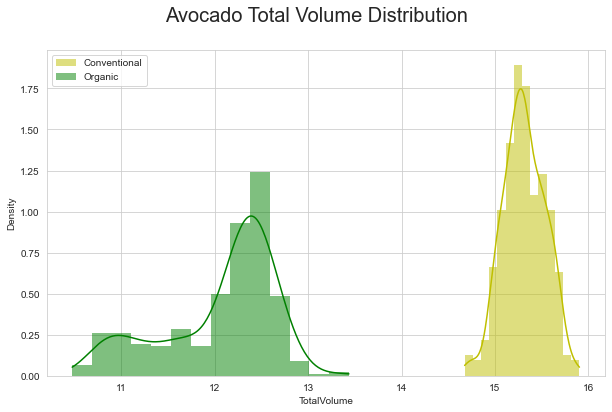

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Avocado Total Volume Distribution', fontsize = 20)
ax1 = sns.histplot(np.log(df1[df1['type']=='conventional']["TotalVolume"]),
                   color = 'y', label = 'Conventional', kde=True,
                   stat="density",linewidth=0)
ax2 = sns.histplot(np.log(df1[df1['type']=='organic']["TotalVolume"]),
                   color = 'g', label = 'Organic', kde=True, stat="density",
                   linewidth=0)
ax.set_xlabel("TotalVolume")
plt.legend(title_fontsize = 12)
plt.show()

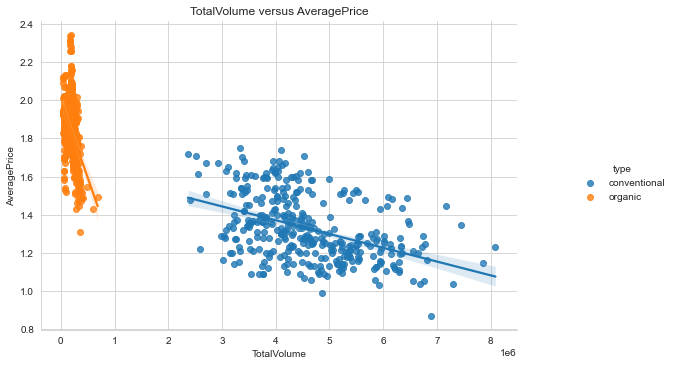

In [25]:
g= sns.lmplot(x='TotalVolume', y='AveragePrice', 
           data=df1, hue='type')
g.fig.set_size_inches(10,5)
plt.title('TotalVolume versus AveragePrice')
plt.show()

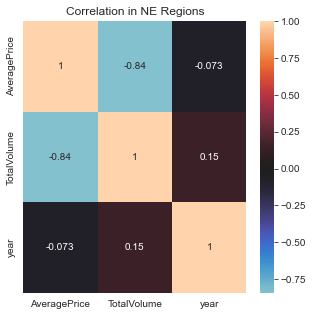

In [26]:
#  correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df_ne.corr(), center=0, annot=True)
plt.title('Correlation in NE Regions')
plt.show()

<AxesSubplot:>

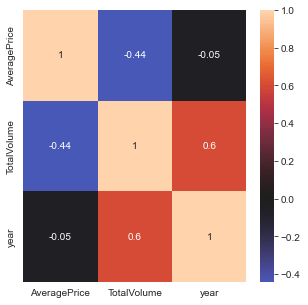

In [27]:
#  correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df_ne_con.corr(), center=0, annot=True)

<AxesSubplot:>

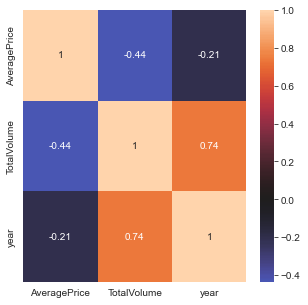

In [28]:
#  correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df_ne_org.corr(), center=0, annot=True)

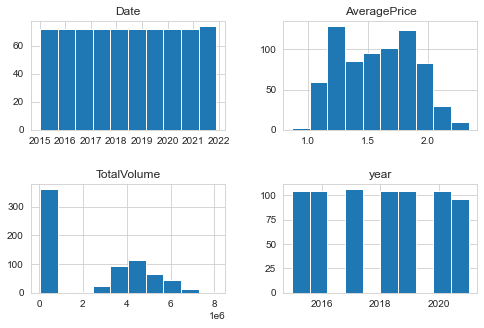

In [29]:
#view the distribution of data 
df1.hist(figsize=(8, 5) )
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

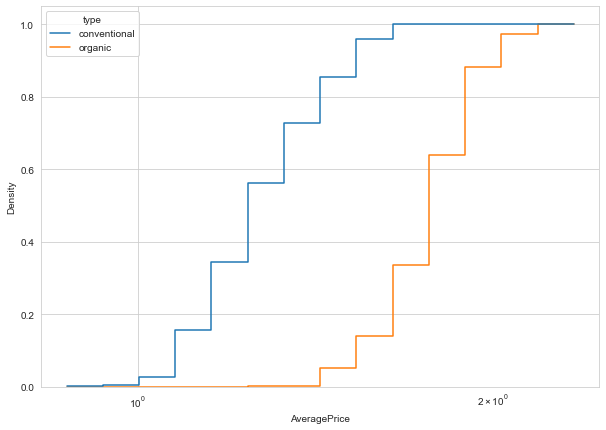

In [30]:
sns.histplot(
    data=df1, x="AveragePrice", hue="type",
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

In [31]:
print(df_ne_org.describe()), print(df_ne_con.describe())

       AveragePrice    TotalVolume         year
count    361.000000     361.000000   361.000000
mean       1.833800  200599.614598  2017.963989
std        0.177507   96044.245228     1.986434
min        1.310566   35304.150000  2015.000000
25%        1.724513  116678.910000  2016.000000
50%        1.823707  216000.770000  2018.000000
75%        1.940000  261881.970000  2020.000000
max        2.342984  684307.920000  2021.000000
       AveragePrice   TotalVolume         year
count    361.000000  3.610000e+02   361.000000
mean       1.328632  4.586129e+06  2017.963989
std        0.168757  1.029569e+06     1.986434
min        0.870000  2.364424e+06  2015.000000
25%        1.203613  3.822362e+06  2016.000000
50%        1.297508  4.454139e+06  2018.000000
75%        1.450000  5.258018e+06  2020.000000
max        1.750000  8.090608e+06  2021.000000


(None, None)

# outliers  NE

In [32]:
#https://www.kaggle.com/abdulmeral/avocado-all-in-one

Box plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

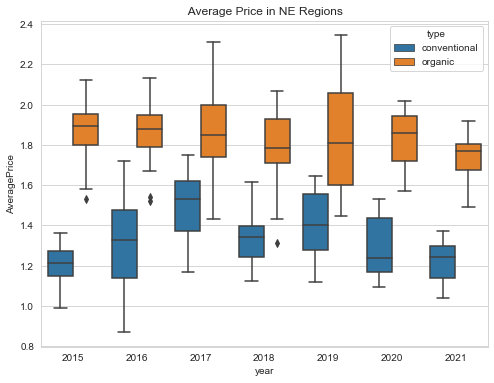

In [33]:
plt.subplots(figsize=(8,6))
sns.boxplot('year','AveragePrice', hue = 'type', data = df_ne)
plt.title(' Average Price in NE Regions')
plt.show()

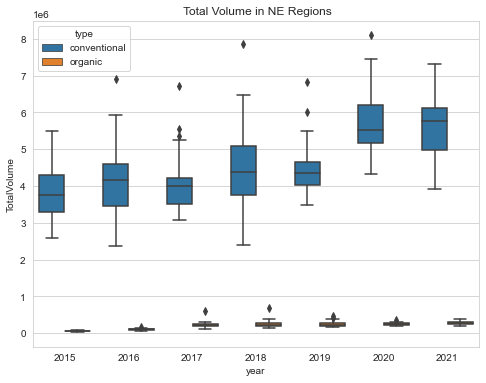

In [34]:
plt.subplots(figsize=(8,6))
sns.boxplot('year','TotalVolume', hue = 'type', data = df_ne)
plt.title(' Total Volume in NE Regions')
plt.show()

# visualizing_time_series

In [35]:
def visualizing_time_serie_tw(df):
    ax= df['AveragePrice'].resample('M').mean().plot(linewidth=2, fontsize=8,color='blue' );
    ax2 = ax.twinx()
    ax2=df['TotalVolume'].resample('M').mean().plot(linewidth=2, fontsize=8,color='red' );
    ax.set_ylabel('Average Price', fontsize=10)
    ax2.set_ylabel('Total Volume', fontsize=10)
    ax.set_title('Average Price and Total Volume - in the northeast region states', fontsize=12)
    plt.legend()
    plt.show()
    return ax

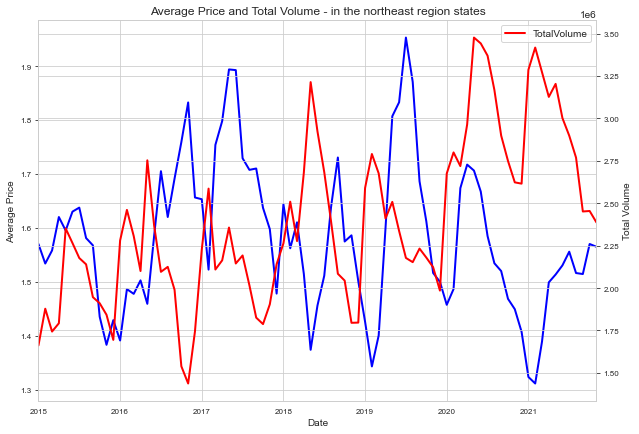

<AxesSubplot:title={'center':'Average Price and Total Volume - in the northeast region states'}, xlabel='Date', ylabel='Average Price'>

In [36]:
visualizing_time_serie_tw(df_ne)

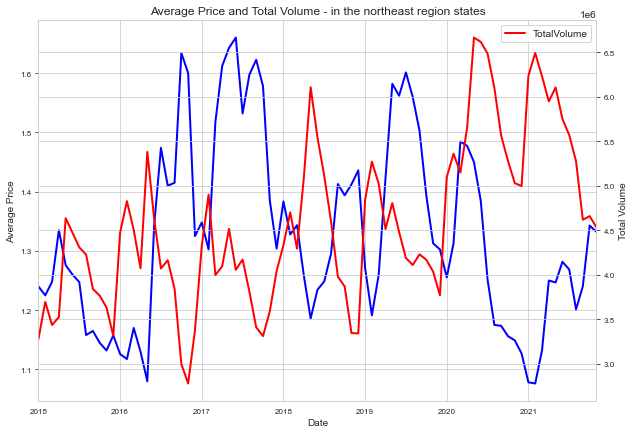

<AxesSubplot:title={'center':'Average Price and Total Volume - in the northeast region states'}, xlabel='Date', ylabel='Average Price'>

In [37]:
visualizing_time_serie_tw(df_ne_con)

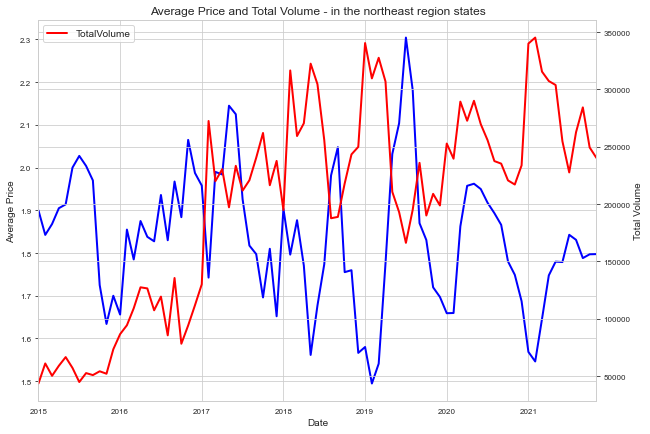

<AxesSubplot:title={'center':'Average Price and Total Volume - in the northeast region states'}, xlabel='Date', ylabel='Average Price'>

In [38]:
visualizing_time_serie_tw(df_ne_org)